# Example Analysis with Zooniverse GalaxyZoo Data

<img src="http://jmcolberg.com/weblog/archives/GalaxyZoo.jpg" width = "600x">

## Step 1: Where are all the galaxies?

Let's see where in the universe our <a href="http://www.galaxyzoo.org"> GalaxyZoo</a> galaxies are located.

You will be using the data file <a href="data/GZ_class_mags.dat">GZ_data.dat</a> which contains all of the classification results for the GalaxyZoo galaxies. Let's see what data is contained in this file. (To read in this data file, we will use 'ascii.read', which is a little different than the fits.open command you used in <a href="../WOrksho2/Part_2.ipynb">Part 2</a> because they are different types of data files).  

In [1]:
#Import needed astropy library
from astropy.table import Table,Column
from astropy.io import ascii

#Read in data table
#Fill in the blank with the ascii.read function as you did in Part 3
Galaxies = ascii.read('data/GZ_class_mags.dat')
Galaxies

#Run this cell (shortcut=shift+enter) to read in your data table.
#Note: Be patient. This is a large file and may take a minute or so to load.

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


ObjID,NVOTE,RA,DEC,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,Spiral,Elliptical,Uncertain,u_mag,g_mag,r_mag,i_mag,z_mag
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64
587727178986356823,59,0.00170833333333,-10.3738055556,0.61,0.034,0.0,0.153,0.153,0.051,0.186,0.61,0.186,0,0,1,20.149,18.3143,17.1948,16.7245,16.3791
587727227300741210,18,0.00308333333333,-9.22227777778,0.611,0.0,0.167,0.222,0.0,0.0,0.389,0.203,0.797,1,0,0,19.3589,18.0247,17.2514,16.8384,16.568
587727225153257596,68,0.00429166666667,-10.9466666667,0.735,0.029,0.0,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1,20.8264,18.8566,17.7259,17.2402,16.8672
587730774962536596,52,0.00575,15.5098055556,0.885,0.019,0.0,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0,19.8579,17.9098,16.6356,16.1118,15.7562
587731186203885750,59,0.00645833333333,-0.0925833333333,0.712,0.0,0.0,0.22,0.068,0.0,0.22,0.64,0.29,0,0,1,19.6768,17.9106,17.0197,16.6269,16.3108
587727180060098638,28,0.00654166666667,-9.49452777778,0.857,0.0,0.036,0.0,0.107,0.0,0.036,0.83,0.06,0,0,1,20.4954,18.7364,17.4411,16.9182,16.5427
587731187277627676,38,0.00775,0.71925,0.5,0.0,0.053,0.289,0.105,0.053,0.342,0.351,0.473,0,0,1,20.1882,18.1929,17.2486,16.8214,16.501
587727223024189605,26,0.00833333333333,15.6971666667,0.423,0.0,0.0,0.577,0.0,0.0,0.577,0.143,0.857,1,0,0,20.2543,18.4574,17.5094,17.0128,16.6355
587730775499407375,62,0.00875,15.8817222222,0.355,0.016,0.21,0.323,0.0,0.097,0.548,0.355,0.548,0,0,1,16.6171,15.4672,14.9073,14.6428,14.4127


In order to determine the <i> location </i> of the galaxies, we will use the galactic latitude and longitude of the galaxies. These are called the <a href="http://astro.unl.edu/classaction/animations/coordsmotion/radecdemo.html">RA and DEC</a> values, and are located in columns three and four. Use these values to create a plot of the location of each galaxy in the sky.

## Make a plot using the commands you learned in <a href="../Workshop1/Part_2.ipynb">Part 2</a>.

In [2]:
""""First create two variables, RA and DEC, that contain the RA and DEC values from the table."""
#Access the 'RA' and 'DEC' values from the Galaxies index and assign those values to RA and DEC, respectively
#If you need a refresher, look back at how you accessed GLON and GLAT data in Part 2

RA = Galaxies["RA"]
DEC = Galaxies["DEC"]

#### Now make a plot of RA vs Dec

Reuse the matplotlib.pyplot commands you used in <a href="../Workshop1/Part_2.ipynb">Part 2</a>.
* Remember, first insert a new cell below, type in your code, and then 'run the cell' by pressing the play button in the top menu.
* Remember to include any needed libraries

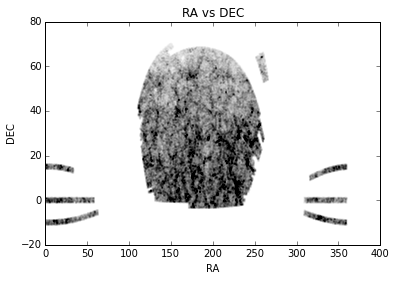

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(RA, DEC, 'ro', markersize = .001)
plt.title('RA vs DEC')
plt.xlabel('RA')
plt.ylabel('DEC')

Your plot of RA vs Dec for all the Galaxy Zoo galaxies will look something like the image below (though doesn't need to be in this same projection). 

The right-hand image shows with a yellow-green squiggle where the disk of our Milky Way galaxy lives. The disk of our Milky Way blocks our view of distant galaxies in that part of our sky. 

<img style="float: left" src="http://classic.sdss.org/dr7/dr7photo_big.gif" width="400x">

<img style="float: right" src="http://farm2.static.flickr.com/1055/4724975807_79f8722a8d_b.jpg" width = "500x">

### Step 2: What Color are Typical Spiral Galaxies?

Subtracting a galaxy's i-band brightness from its g-band brightness can tell you how much bluer or redder the galaxy is. Smaller values of g-i mean the galaxy is bluer, larger values of g-i means that it's redder.

<img src="http://faculty.wcas.northwestern.edu/aaron-geller/myimages/sequence-de-hubble-galaxies.jpg" width = "600x">
<img src="http://faculty.wcas.northwestern.edu/aaron-geller/myimages/plot_sdss_filters_1.png" width = "600x">



### We will need to use the numpy functions np.array and np.subtract to create a new array of corrected color numbers.

#### 'np.array' creates an array of numbers from a data set. See the example below:

In [4]:
#Import needed numpy library
import numpy as np

my_array = np.array([1, 2, 3, 4])
print my_array

[1 2 3 4]


#### 'np.subtract' subtracts one number from another. See the example below:

In [7]:
#Import needed numpy library
import numpy as np

new_number = np.subtract(7, 3)
print new_number

4


### You are going to create arrays called gmag and imag that have the data from the g_mag and i_mag columns in the galaxies data set. <br> <br> Then you will subtract imag from gmag

In [8]:
#Create your gmag array using np.array and Galaxies['g_mag']
gmag = np.array(Galaxies['g_mag'])

#Create your imag array using np.array and Galaxies['i_mag']
imag = np.array(Galaxies['i_mag'])

#Use np.subtract to subtract the imag array from the gmag array
color = np.subtract(gmag, imag)

#As a test, print the color values for the first ten galaxies
print color[0:10]

#Print the minimum and maximum color value
print 'min/max color:',min(color),max(color)

[ 1.5898  1.1863  1.6164  1.798   1.2837  1.8182  1.3715  1.4446  0.8244
  1.6683]
min/max color: -10015.3137 10017.4529


Do you notice how the color values for the first ten galaxies are all around '1', but the min & max color values are really high and really low? 

These very high/low values are because there are some sources for which the telescope was unable to get a good value for magnitude or brightness. In the table, the magnitudes for these sources have been set to -999, as a flag to indicate that they're bad values. 

Often when working with data, you'll need to be aware of 'bad' values and make sure you filter them out.

## To Flag bad color values: Use np.where to pick out the indices with values greater than 99 or less than -99.

Use np.where and identify the index values where color < -99 or color > 99. (If you need a refresher on how to use the 'where' function, look back at <a href="Part_3.ipynb">Part 3</a>.).

In [9]:
#Make x equal to the values where color < -99
x = np.where(color < -99)[0]
#Make y equal to the values where color > 99
y = np.where(color > 99)[0]

#Set the color values for these bad spots to NAN (not a finite number)
#This will ensure the bad data points don't end up in your histogram
color[x] = np.nan
color[y] = np.nan

(array([  3.00000000e+00,   4.00000000e+00,   5.60000000e+01,
          1.05000000e+02,   5.81150000e+04,   6.09463000e+05,
          1.41000000e+02,   4.40000000e+01,   4.00000000e+00,
          7.00000000e+00]),
 array([-13.9721, -11.0243,  -8.0765,  -5.1287,  -2.1809,   0.7669,
          3.7147,   6.6625,   9.6103,  12.5581,  15.5059]),
 <a list of 10 Patch objects>)

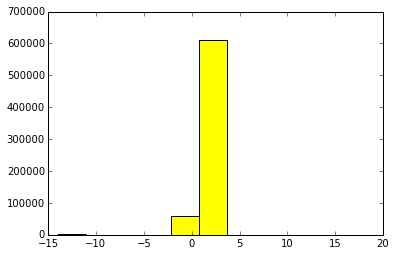

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#Plot a histogram of the finite values in the color array
#note, there are no more color < -99 or color > 99 values
#notice how we use the np.isfinite to pick out just the finite color values
plt.hist(color[np.isfinite(color)],facecolor='yellow')

Above you should have created a histogram that gives you the colors for the galaxies in GalaxyZoo

## Now let's analyze the data provided by GalaxyZoo and see the differences and similarities between the colors of the Elliptical and Spiral galaxies

##### Part A: Make an array of the indices for spiral galaxies

In [11]:
#Use the 'where' function to identify all the Spiral galaxies.
#Fill in the blank with the identifier for spiral galaxies: 'Spiral'
spirals_ind = np.where(Galaxies['Spiral'] == 1)[0]

#Just to see that these are indices of the array, print the first 10 values
print spirals_ind[0:10]

[ 1  7  9 13 18 34 35 36 42 44]


Look at the indices printed above and compare with where you see the Spiral column equal '1' in the data table. Does this make sense? <br>
Note: in Python, you start counting with '0' as your first number.

##### Part B: Make an array with the colors just for Spiral galaxies:

In [13]:
#Pick out the subset of color values associated with the spiral galaxy indices
#Fill in the blank with spirals_ind
spirals_color = color[spirals_ind]

print spirals_color[0:10]
print min(spirals_color),max(spirals_color)

[ 1.1863  1.4446  1.6683  1.6858  0.5735  1.9207  1.4939  1.7262  1.8113
  1.4265]
-6.7818 9.0222


### Now repeat Parts A and B for elliptical galaxies

In [15]:
#Use the 'where' function to identify all the Elliptical galaxies.
ellipticals_ind = np.where(Galaxies['Elliptical'] == 1)[0]

#Pick out the subset of color values associated with the elliptical galaxy indices
ellipticals_color = color[ellipticals_ind]

## Now let's make a plot of the Spiral Galaxies' color vs. the number of galaxies that are that color (i.e., a histogram).

(0, 3)

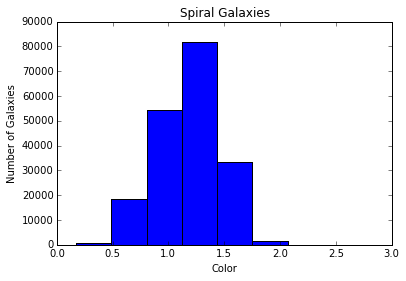

In [16]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

#Plot a histogram for the spirals' color
#notice how we use the np.isfinite to pick out just the finite color values
plt.hist(spirals_color[np.isfinite(spirals_color)],bins=50,facecolor='blue')

#Label the plot
plt.xlabel('Color')
plt.ylabel('Number of Galaxies')
plt.title('Spiral Galaxies')
plt.xlim(xmin=0,xmax=3)

## Make the same histogram plot, but for the Elliptical Galaxies' color.

(0, 3)

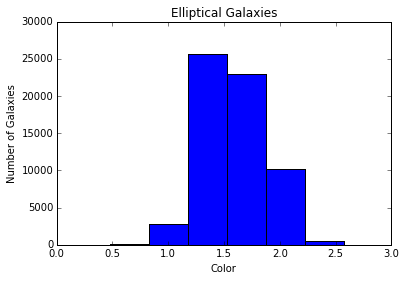

In [18]:
plt.hist(ellipticals_color[np.isfinite(ellipticals_color)],bins=50,facecolor='blue')
plt.xlabel('Color')
plt.ylabel('Number of Galaxies')
plt.title('Elliptical Galaxies')
plt.xlim(xmin=0,xmax=3)

# Now overplot the Spiral color histogram over the Elliptical color histogram

For suggestions on how to overplot in a histogram plot, go <a href="../examples/MultipleHistogramsExample.ipynb">here</a>.

<!--- a http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html http://www.bertplot.com/visualization/?p=229
      "-->

(0, 3)

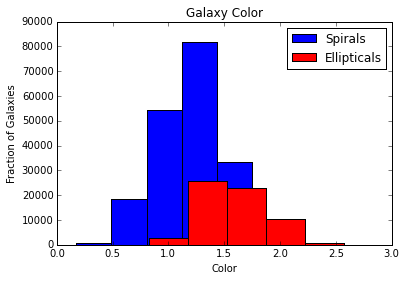

In [19]:
#Plot the spirals_color histogram
plt.hist(spirals_color[np.isfinite(spirals_color)],bins=50, facecolor='blue',label='Spirals',)

#Overplot the ellipticals_color histogram
plt.hist(ellipticals_color[np.isfinite(ellipticals_color)],bins=50, facecolor='red',label='Ellipticals')

plt.legend()
plt.xlabel('Color')
plt.ylabel('Fraction of Galaxies')
plt.title('Galaxy Color')
plt.xlim(xmin=0,xmax=3)

What do you notice about the color of the Spiral Galaxies? Do you see how most are bluer in color? Remember, the lower the value for 'g-i' color, the bluer the galaxy. The bluer color indicates that the galaxy is currently making new stars (i.e., has active star formation). 

The result (that spiral galaxies tend to be bluer) makes sense. The figure below shows a typical example of a blue, actively star forming, spiral galaxy.

<img src="http://i.space.com/images/i/000/044/763/i02/area-around-andromeda-galaxy.jpg?1420653454">

However, also notice the exceptions. In your histogram, you see that a number of spiral galaxies are redder in color (have higher 'g-i' color values). These are galaxies where classifiers saw they had spiral arms, but their color tells us that they have no active star formation happening. <a href="http://www.sciencedaily.com/releases/2008/11/081124194936.htm">A special process has shut off star formation in these galaxies.</a> 

Finding this intriguing result was possible because of the huge numbers of galaxies in GalaxyZoo!

### Step 3: Looking at individual galaxies of interest.

If you identify a subset of galaxies in the GalaxyZoo data table that you'd like to look at individually in more detail, you can do the following:

In [20]:
#Select particular galaxies of interest, for example, red spirals

# np.where picks out sources that have 
# 1.9 < color > 1.91 AND they are spiral galaxies
redSpirals = np.where((color > 1.9) & (color < 1.91) & (Galaxies['Spiral'] == 1))[0]

#The 'len' command is short for 'length'
#It tells you how many sources are in the RedSpirals array
print '# of Red Spirals: ',len(redSpirals)

#Print the RA, Dec values for the galaxies of interest
#Use a for loop to print the RA,DEC values as a pair for each galaxy
for j in redSpirals:
    print Galaxies['RA'][j],Galaxies['DEC'][j]

# of Red Spirals:  20
10.3735416667 13.8214166667
11.0037083333 -10.1454722222
33.5283333333 14.0545277778
112.463458333 43.1997222222
118.928291667 33.1065277778
130.72725 30.0555
149.356041667 25.5977222222
151.625541667 12.2164444444
177.328708333 14.0585833333
195.904 53.6451666667
203.014416667 -2.33183333333
204.711666667 65.611
210.088708333 28.5246944444
217.383083333 34.6303333333
220.08425 18.2596111111
227.840458333 30.8816944444
229.559666667 11.0393888889
313.762958333 -0.0913611111111
342.803125 0.917111111111
346.412916667 13.8288611111


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


### Visualize these Red Spirals

Now copy and paste these RA,Dec values into the <a href="http://skyserver.sdss.org/dr7/en/tools/chart/navi.asp">SDSS SkyServer finder chart</a>. You'll see an image of the galaxy of interest. <br>

Click on 'Quick Look' in the middle right of that page to get additional information about your galaxy.<br>

Do you see how they're red spirals?! Check out <a href="http://arxiv.org/abs/0910.4113">Dr. Karen Masters article on Red Spirals in Galaxy Zoo</a>.

# Congratulations! You've completed Part 4!

## Extension Activity:
#### Look for other trends in galaxy type, magnitude, and/or color. Do your results make sense?